In [1]:
import tensorflow as tf
from tensorflow import keras
import os
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import np_utils, plot_model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


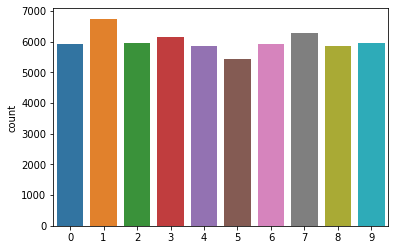

In [3]:
%matplotlib inline
import seaborn as sns
g = sns.countplot(y_train)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2, data_format='channels_first'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1605888   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 1,608,778
Trainable params: 1,608,778
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#history = model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)
history = model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.1681 - accuracy: 0.9493 - val_loss: 0.0588 - val_accuracy: 0.9813
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0544 - accuracy: 0.9834 - val_loss: 0.0506 - val_accuracy: 0.9839
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0411 - val_accuracy: 0.9876
Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0429 - val_accuracy: 0.9851
Epoch 5/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0501 - val_accuracy: 0.9845
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.0407 - val_accuracy: 0.9870
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0386 - val_accuracy: 0.9881
Epoch 

In [8]:
import matplotlib.image as mpimg # mpimg 用於讀取圖片
import matplotlib.pyplot as plt # plt 用於顯示圖片
import seaborn as sns
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

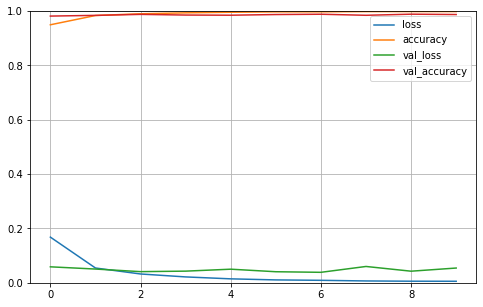

In [9]:
import pandas as pd
plot_learning_curves(history)

In [ ]:
# model.save("aaa.hpf5")
# model.load_weights("aaa.hpf5")